In [11]:
import numpy as np
import scipy
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import scipy.optimize
import time
plt.rcParams["figure.figsize"] = (3,3)

print (time.ctime())

Thu Jun 25 11:37:04 2020


In [12]:
# read a data file, store all data in arrays

file = "fourions_trigger100kHz_300s_W0028_H11-200211-192509-1_cent.csv"
data=np.loadtxt(file, dtype= float, delimiter=",", usecols = (0,1,2,3,4,5,6,7,8))

#print data
y   = data[:, 2]
x   = data[:, 3]
t   = data[:, 4]
a   = data[:, 5]
A   = data[:, 6]
n   = data[:, 8]
tid = data[:, 0]
tt  = data[:, 1]
tof = data[:, 7]

for i in range(0,20):
    print (i, x[i],y[i],t[i],a[i],A[i],n[i], tid[i], tt[i], tof[i])
    
print (len(t), time.ctime())

0 41.0 21.0 223214660352.0 600.0 1800.0 5.0 3339.0 223214445269.0 215083.0
1 118.0 103.0 223225393408.0 4450.0 10000.0 9.0 3345.0 223224409344.0 984064.0
2 121.0 104.0 223241841664.0 4425.0 10975.0 10.0 3355.0 223241016277.0 825387.0
3 244.0 174.0 223266771200.0 2450.0 6000.0 6.0 3370.0 223265926698.0 844502.0
4 119.0 101.0 223300164608.0 1675.0 3900.0 5.0 3390.0 223299140437.0 1024171.0
5 58.0 104.0 223326432768.0 1875.0 3975.0 4.0 3406.0 223325711488.0 721280.0
6 94.0 104.0 223337742080.0 1500.0 2500.0 4.0 3413.0 223337336405.0 405675.0
7 36.0 127.0 223340671232.0 850.0 2600.0 4.0 3415.0 223340657792.0 13440.0
8 208.0 95.0 223352399104.0 2350.0 5575.0 4.0 3422.0 223352282581.0 116523.0
9 122.0 107.0 223353674240.0 1750.0 4275.0 4.0 3422.0 223352282581.0 1391659.0
10 108.0 75.0 223356582144.0 2725.0 9300.0 9.0 3424.0 223355603925.0 978219.0
11 124.0 103.0 223360432128.0 1175.0 2225.0 4.0 3426.0 223358925312.0 1506816.0
12 90.0 104.0 223403077632.0 2025.0 5275.0 6.0 3452.0 223402103296

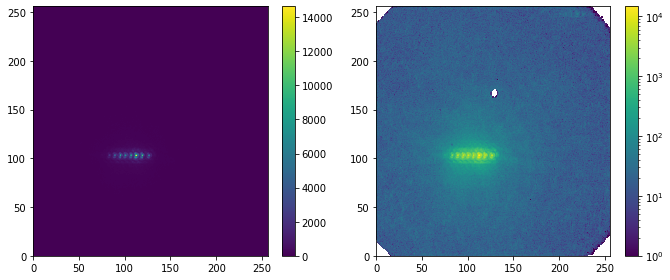

In [13]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(x, y, bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

In [14]:
#1st position
x1r = []; y1r = []; t1r = []; a1r = []; n1r = []; tof1r = []

px1min = 80;  px1max = 87; py1min = 98; py1max = 106; 

for i in range(len(x)-1):
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
    if ( px1min < x[i] < px1max and py1min < y[i] < py1max): 
        x1r.append(x[i])
        y1r.append(y[i])
        t1r.append(t[i]/4096.*25.)
        tof1r.append(tof[i]/4096.*25.)
        a1r.append(a[i])
        n1r.append(n[i])

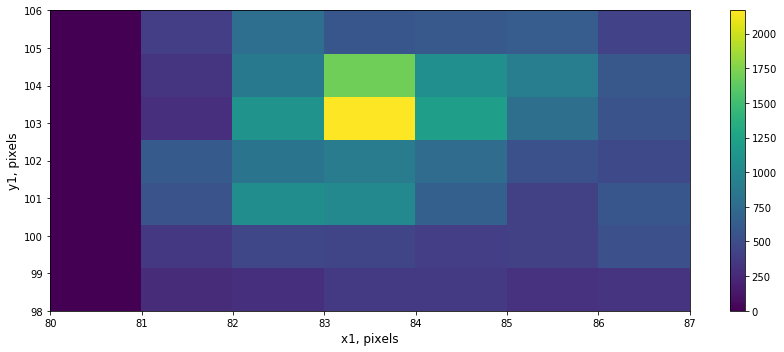

In [15]:
#1st position

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 5))

h1 = ax0.hist2d(x1r, y1r, bins = (px1max-px1min), range = [(px1min, px1max), (py1min, py1max)])
#ax0.set_title("X1-X2 vs Y1-Y2", fontsize = 12) # change the title
ax0.set_xlabel('x1, pixels',fontsize = 12)
ax0.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

fig.tight_layout()
plt.show()

In [16]:
#3rd position

x3r = []; y3r = []; t3r = []; a3r = []; n3r = []; tof3r = []

px3min = 93;  px3max = 100; py3min = 98; py3max = 106; 

for i in range(len(x)-1):
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
    if ( px3min < x[i] < px3max and py3min < y[i] < py3max): 
        x3r.append(x[i])
        y3r.append(y[i])
        t3r.append(t[i]/4096.*25.)
        tof3r.append(tof[i]/4096.*25.)
        a3r.append(a[i])
        n3r.append(n[i])

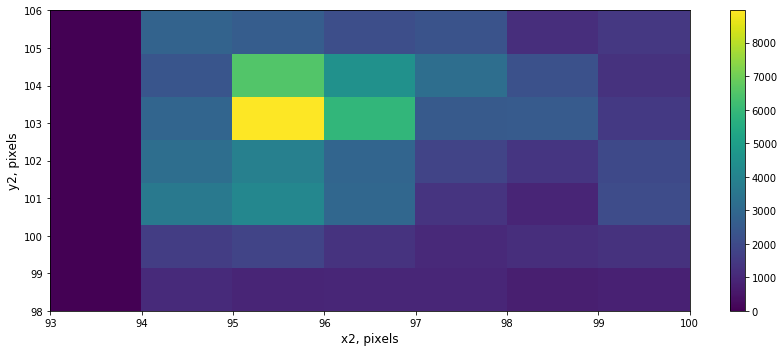

In [17]:
#3rd position plot

fig, (ax3) = plt.subplots(ncols=1, figsize=(12, 5))

h1 = ax3.hist2d(x3r, y3r, bins = (px3max-px3min), range = [(px3min, px3max), (py3min, py3max)])
#ax0.set_title("X1-X2 vs Y1-Y2", fontsize = 12) # change the title
ax3.set_xlabel('x2, pixels',fontsize = 12)
ax3.set_ylabel('y2, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax3)

fig.tight_layout()
plt.show()

In [18]:
#2nd position
x2r = []; y2r = []; t2r = []; a2r = []; n2r = []; tof2r = []

px2min = 88;  px2max = 92; py2min = 98; py2max = 106; 

for i in range(len(x)-1):
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
    if ( px2min < x[i] < px2max and py2min < y[i] < py2max): 
        x2r.append(x[i])
        y2r.append(y[i])
        t2r.append(t[i]/4096.*25.)
        tof2r.append(tof[i]/4096.*25.)
        a2r.append(a[i])
        n2r.append(n[i])

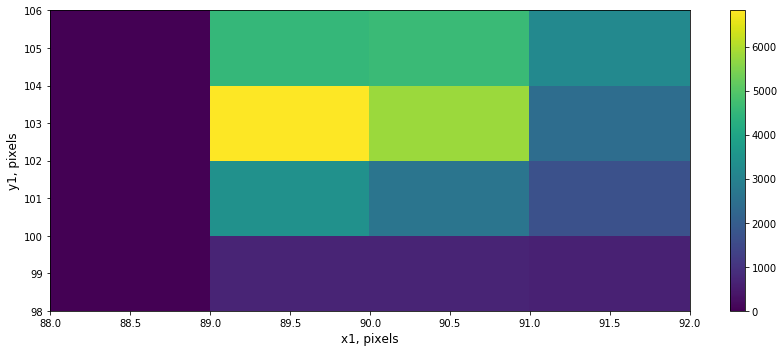

In [19]:
#2nd position plot

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 5))

h1 = ax0.hist2d(x2r, y2r, bins = (px2max-px2min), range = [(px2min, px2max), (py2min, py2max)])
#ax0.set_title("X1-X2 vs Y1-Y2", fontsize = 12) # change the title
ax0.set_xlabel('x1, pixels',fontsize = 12)
ax0.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

fig.tight_layout()
plt.show()

In [20]:
#4th position
x4r = []; y4r = []; t4r = []; a4r = []; n4r = []; tof4r = []

px4min = 110;  px4max = 117; py4min = 98; py4max = 106; 

for i in range(len(x)-1):
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
    if ( px4min < x[i] < px4max and py4min < y[i] < py4max): 
        x4r.append(x[i])
        y4r.append(y[i])
        t4r.append(t[i]/4096.*25.)
        tof4r.append(tof[i]/4096.*25.)
        a4r.append(a[i])
        n4r.append(n[i])

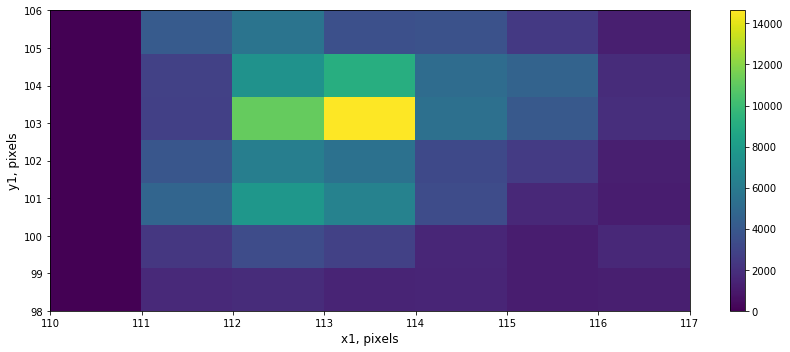

In [21]:
#4nd position plot

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 5))

h1 = ax0.hist2d(x4r, y4r, bins = (px4max-px4min), range = [(px4min, px4max), (py4min, py4max)])
#ax0.set_title("X1-X2 vs Y1-Y2", fontsize = 12) # change the title
ax0.set_xlabel('x1, pixels',fontsize = 12)
ax0.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

fig.tight_layout()
plt.show()

In [22]:
#5th position
x5r = []; y5r = []; t5r = []; a5r = []; n5r = []; tof5r = []

px5min = 117;  px5max = 124; py5min = 98; py5max = 106; 

for i in range(len(x)-1):
    if (i-(i/10000)*10000 == 1): 
        print (i, time.ctime())
    if ( px5min < x[i] < px5max and py5min < y[i] < py5max): 
        x5r.append(x[i])
        y5r.append(y[i])
        t5r.append(t[i]/4096.*25.)
        tof5r.append(tof[i]/4096.*25.)
        a5r.append(a[i])
        n5r.append(n[i])

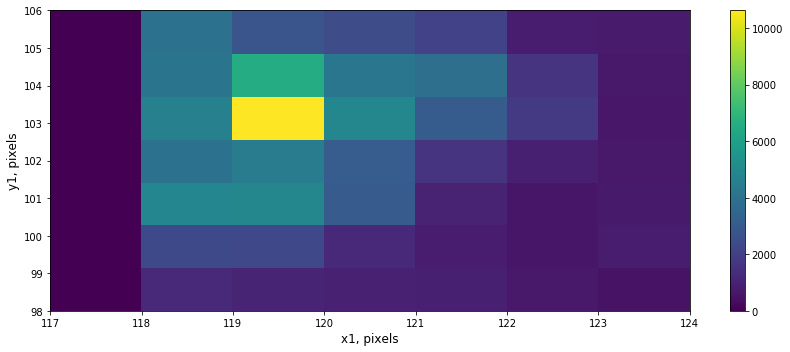

In [23]:
#5nd position plot

fig, (ax0) = plt.subplots(ncols=1, figsize=(12, 5))

h1 = ax0.hist2d(x5r, y5r, bins = (px5max-px5min), range = [(px5min, px5max), (py5min, py5max)])
#ax0.set_title("X1-X2 vs Y1-Y2", fontsize = 12) # change the title
ax0.set_xlabel('x1, pixels',fontsize = 12)
ax0.set_ylabel('y1, pixels',fontsize = 12)
fig.colorbar(h1[3], ax = ax0)

fig.tight_layout()
plt.show()

A = -0.00016787073939155293 freq = 0.018251057042480937 phase =  -0.22930778287329623 c =  0.00019974753767930745
A = -0.0001687530508217999 freq = 0.018253541656839175 phase =  -0.2280200279806247 c =  0.00019975384193703137
A = -0.00016938588038816537 freq = 0.01825100588028266 phase =  -0.2357245879196709 c =  0.0001997315811658889
A = -0.00017085889883292033 freq = 0.01825193483214884 phase =  -0.23561407607784865 c =  0.00019973068437924754
A = -0.0001736477523523109 freq = 0.018252911323817216 phase =  -0.2462183698103677 c =  0.0001997045851305995


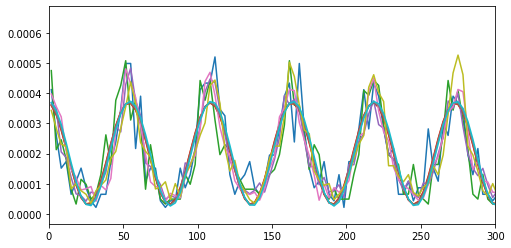

In [24]:
#fitting with sin, working with histogram

tmin  = 0.
tmax  = 5000.
nbins = 1500
smpl = (tmax - tmin)/nbins

#plt.hist(tof2, bins = 100, range = (0, 200), color = 'r', ec = 'k')

hist, bin_edges = np.histogram(tof1r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

hist1, bin_edges1 = np.histogram(tof2r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres1 = (bin_edges1[:-1] + bin_edges1[1:])/2

hist2, bin_edges2 = np.histogram(tof3r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres2 = (bin_edges1[:-1] + bin_edges1[1:])/2

hist3, bin_edges3 = np.histogram(tof4r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2

hist4, bin_edges4 = np.histogram(tof5r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres4 = (bin_edges4[:-1] + bin_edges4[1:])/2

# guess parameters, frequency is taken from FFT
def guess_f (bin_centres,hist):
    xx = np.array(bin_centres)
    yy = np.array(hist)
    ff = np.fft.fftfreq(len(bin_centres),smpl)
    Fyy = abs(np.fft.fft(hist))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])
    guess_amp = np.max(hist)
    guess_offset = 0
    guess  = np.array([guess_amp, guess_freq,0.,guess_offset])
    #plt.figure(figsize=(8, 4))
    #plt.xlim(-0.2,0.2)
    #plt.plot(ff,Fyy)
    return (guess)
    
# fitting with abs(sin)
def sinfunc_abs(t, A, w, p, c): return A*np.sin(2*np.pi*(w*t + p))+ c
popt, pcov = scipy.optimize.curve_fit(sinfunc_abs, bin_centres, hist, p0=guess_f(bin_centres,hist))
popt1, pcov1 = scipy.optimize.curve_fit(sinfunc_abs, bin_centres1, hist1, p0=guess_f(bin_centres1,hist1))
popt2, pcov2 = scipy.optimize.curve_fit(sinfunc_abs, bin_centres2, hist2, p0=guess_f(bin_centres2,hist2))
popt3, pcov3 = scipy.optimize.curve_fit(sinfunc_abs, bin_centres3, hist3, p0=guess_f(bin_centres3,hist3))
popt4, pcov4 = scipy.optimize.curve_fit(sinfunc_abs, bin_centres4, hist4, p0=guess_f(bin_centres3,hist4))

print ('A =', popt[0], 'freq =', popt[1], 'phase = ', popt[2], 'c = ', popt[3])
print ('A =', popt1[0], 'freq =', popt1[1], 'phase = ', popt1[2], 'c = ', popt1[3])
print ('A =', popt2[0], 'freq =', popt2[1], 'phase = ', popt2[2], 'c = ', popt2[3])
print ('A =', popt3[0], 'freq =', popt3[1], 'phase = ', popt3[2], 'c = ', popt3[3])
print ('A =', popt4[0], 'freq =', popt4[1], 'phase = ', popt4[2], 'c = ', popt4[3])

data_fit = sinfunc_abs(bin_centres, *popt)
data_fit1 = sinfunc_abs(bin_centres1, *popt1)
data_fit2 = sinfunc_abs(bin_centres2, *popt2)
data_fit3 = sinfunc_abs(bin_centres3, *popt3)
data_fit4 = sinfunc_abs(bin_centres4, *popt4)

plt.figure(figsize=(8, 4))
plt.xlim(0,300)
plt.plot(bin_centres, hist)
plt.plot(bin_centres, data_fit)
plt.plot(bin_centres1, hist1)
plt.plot(bin_centres1, data_fit1)
plt.plot(bin_centres2, hist2)
plt.plot(bin_centres2, data_fit2)
plt.plot(bin_centres3, hist3)
plt.plot(bin_centres3, data_fit3)
plt.plot(bin_centres4, hist4)
plt.plot(bin_centres4, data_fit4)

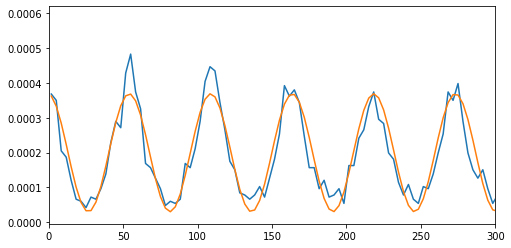

In [25]:
plt.figure(figsize=(8, 4))
plt.xlim(0,300)
plt.plot(bin_centres2, hist2)
plt.plot(bin_centres2, data_fit2)

A = 0.00488367395333907 B = 2.2933323526595383e-07 freq =  0.018251258081933296 phase =  -12.408631652538334 sat param = 11.9565309834678 detuning = 2.9320196663681157


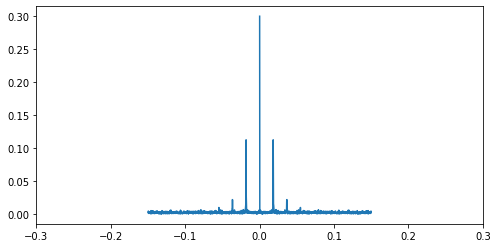

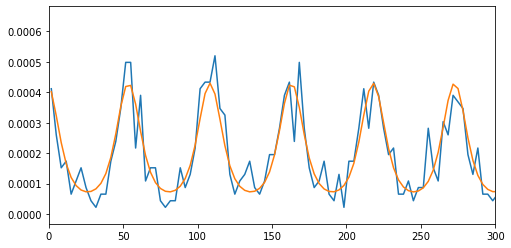

In [26]:
tmin  = 0.
tmax  = 5000.
nbins = 1500
smpl = (tmax - tmin)/nbins

hist, bin_edges = np.histogram(tof1r, range=(tmin,tmax), bins=nbins, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# guess parameters, frequency is taken from FFT
def guess_f1 (bin_centres,hist):
    xx = np.array(bin_centres)
    yy = np.array(hist-np.mean(hist))
    ff = np.fft.fftfreq(len(bin_centres),smpl)
    Fyy = abs(np.fft.fft(hist))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])
    guess_amp = np.max(hist)
    guess_amp1 = 0.00001
    guess_s = 2
    #guess_offset = 0
    guess_delta = -0.3
    guess  = np.array([guess_amp,guess_amp1, guess_freq,0.,guess_s,guess_delta])
    plt.figure(figsize=(8, 4))
    plt.xlim(-0.3,0.3)
    plt.plot(ff,Fyy)
    return (guess)

# fitting with (9.3) from Foot
# s = I/Isat; s is around 3 (?)
# D - detuning (w-w0), around 20 MHz
#Omega^2 = (s*Gamma^2)/2, Gamma = 30 MHz
#s = 2
gamma = 0.6
#delta = -0.3
def r_scatt(t, A, B, w, p, s,delta): return (A/(np.abs(s)+1+4*np.power((delta+np.pi/(493)*np.power(10,9)*np.abs(B)*np.sin(2*w*np.pi*((t-smpl/2)+p))),2)/np.power(gamma,2)) + A/(np.abs(s)+1+4*np.power((delta+np.pi/(493)*np.power(10,9)*np.abs(B)*np.sin(2*w*np.pi*((t+smpl/2)+p))),2)/np.power(gamma,2)))*smpl/2

# integrate (9.3)
#photons = (hist[:-1] + hist[1:])*(bin_edges[1:]-bin_edges[:-1])/2

popt, pcov = scipy.optimize.curve_fit(r_scatt, bin_centres, hist, p0=guess_f1(bin_centres,hist),maxfev=50000)

print ('A =', popt[0], 'B =', popt[1], 'freq = ', popt[2], 'phase = ', popt[3], 'sat param =', popt[4], 'detuning =', popt[5])

data_fit = r_scatt(bin_centres, *popt)

plt.figure(figsize=(8, 4))
plt.xlim(0,300)
plt.plot(bin_centres, hist)
plt.plot(bin_centres, data_fit)